<a href="https://colab.research.google.com/github/Anushka-ag16/stock-market-analysis/blob/main/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of ticker symbols and the date range
ticker_list = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
start_date = "2020-01-01"
end_date = "2023-01-01"

# Fetch the historical data for all tickers
all_data = yf.download(ticker_list, start=start_date, end=end_date)

# Display the structure of the multi-level dataframe
all_data.head()



/tmp/ipython-input-2-1556263282.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  all_data = yf.download(ticker_list, start=start_date, end=end_date)
[*********************100%***********************]  4 of 4 completed


Price           Close                                         High             \
Ticker           AAPL       AMZN      GOOGL        MSFT       AAPL       AMZN   
Date                                                                            
2020-01-02  72.620827  94.900497  68.026024  153.042297  72.681274  94.900497   
2020-01-03  71.914825  93.748497  67.670151  151.136642  72.676454  94.309998   
2020-01-06  72.487846  95.143997  69.473846  151.527313  72.526533  95.184502   
2020-01-07  72.146942  95.343002  69.339645  150.145752  72.753823  95.694504   
2020-01-08  73.307510  94.598503  69.833191  152.537308  73.609745  95.550003   

Price                                    Low                        \
Ticker          GOOGL        MSFT       AAPL       AMZN      GOOGL   
Date                                                                 
2020-01-02  68.026024  153.147108  71.373203  93.207497  66.923141   
2020-01-03  68.278009  152.403898  71.689965  93.224998  66.964384   
2020-01-06  69.499192  151.594018  70.783248  93.000000  67.147300   
2020-01-07  69.756647  152.137147  71.926915  94.601997  69.163206   
2020-01-08  70.171661  153.213818  71.849533  94.321999  69.216391   

Price                        Open                                    \
Ticker            MSFT       AAPL       AMZN      GOOGL        MSFT   
Date                                                                  
2020-01-02  150.860341  71.627077  93.750000  67.018569  151.289108   
2020-01-03  150.603064  71.847125  93.224998  66.998186  150.850807   
2020-01-06  149.126197  71.034709  93.000000  67.178606  149.669313   
2020-01-07  149.898023  72.497529  95.224998  69.605552  151.803668   
2020-01-08  150.498269  71.849533  94.902000  69.325236  151.432030   

Price          Volume                                
Ticker           AAPL      AMZN     GOOGL      MSFT  
Date                                                 
2020-01-02  135480400  80580000  27278000  22622100  
2020-01-03  146322800  75288000  23408000  21116200  
2020-01-06  118387200  81236000  46768000  20813700  
2020-01-07  108872000  80898000  34330000  21634100  
2020-01-08  132079200  70160000  35314000  27746500

In [ ]:
all_data.head(10)

Price           Close                                         High             \
Ticker           AAPL       AMZN      GOOGL        MSFT       AAPL       AMZN   
Date                                                                            
2020-01-02  72.620827  94.900497  68.026024  153.042297  72.681274  94.900497   
2020-01-03  71.914825  93.748497  67.670151  151.136642  72.676454  94.309998   
2020-01-06  72.487846  95.143997  69.473846  151.527313  72.526533  95.184502   
2020-01-07  72.146942  95.343002  69.339645  150.145752  72.753823  95.694504   
2020-01-08  73.307510  94.598503  69.833191  152.537308  73.609745  95.550003   
2020-01-09  74.864609  95.052498  70.566284  154.442947  75.058036  95.890999   
2020-01-10  75.033882  94.157997  71.022057  153.728317  75.599671  95.347000   
2020-01-13  76.636925  94.565002  71.572258  155.576797  76.663525  94.900002   
2020-01-14  75.602081  93.472000  71.103081  154.481033  76.784425  94.355499   
2020-01-15  75.278069  93.100998  71.531006  155.481552  76.283905  93.943001   

Price                                    Low                        \
Ticker          GOOGL        MSFT       AAPL       AMZN      GOOGL   
Date                                                                 
2020-01-02  68.026024  153.147108  71.373203  93.207497  66.923141   
2020-01-03  68.278009  152.403898  71.689965  93.224998  66.964384   
2020-01-06  69.499192  151.594018  70.783248  93.000000  67.147300   
2020-01-07  69.756647  152.137147  71.926915  94.601997  69.163206   
2020-01-08  70.171661  153.213818  71.849533  94.321999  69.216391   
2020-01-09  71.008130  154.566819  74.035280  94.790001  70.090136   
2020-01-10  71.319278  155.519627  74.530968  94.000000  70.556852   
2020-01-13  71.644320  155.605381  75.232141  94.040001  70.843626   
2020-01-14  71.701489  155.881683  75.478775  92.927498  70.962915   
2020-01-15  71.609537  156.205706  74.845267  92.754501  71.156254   

Price                        Open                                    \
Ticker            MSFT       AAPL       AMZN      GOOGL        MSFT   
Date                                                                  
2020-01-02  150.860341  71.627077  93.750000  67.018569  151.289108   
2020-01-03  150.603064  71.847125  93.224998  66.998186  150.850807   
2020-01-06  149.126197  71.034709  93.000000  67.178606  149.669313   
2020-01-07  149.898023  72.497529  95.224998  69.605552  151.803668   
2020-01-08  150.498269  71.849533  94.902000  69.325236  151.432030   
2020-01-09  153.432958  74.286734  95.494499  70.672641  154.204742   
2020-01-10  153.575862  75.099169  95.268501  71.047410  155.138504   
2020-01-13  153.652093  75.350622  94.565498  71.334677  154.128504   
2020-01-14  154.090373  76.574071  94.293999  71.570773  155.681584   
2020-01-15  154.900344  75.401382  93.612503  71.223850  154.947974   

Price          Volume                                
Ticker           AAPL      AMZN     GOOGL      MSFT  
Date                                                 
2020-01-02  135480400  80580000  27278000  22622100  
2020-01-03  146322800  75288000  23408000  21116200  
2020-01-06  118387200  81236000  46768000  20813700  
2020-01-07  108872000  80898000  34330000  21634100  
2020-01-08  132079200  70160000  35314000  27746500  
2020-01-09  170108400  63346000  33200000  21385000  
2020-01-10  140644800  57074000  26258000  20725900  
2020-01-13  121532000  55616000  30730000  21626500  
2020-01-14  161954400  68818000  26076000  23477400  
2020-01-15  121923600  57932000  21550000  21417900

In [ ]:
# Loop through each ticker to calculate the technical indicators
for ticker in ticker_list:
    # Calculate 50-day and 200-day moving averages
    all_data[('MA50', ticker)] = all_data[('Close', ticker)].rolling(window=50).mean()
    all_data[('MA200', ticker)] = all_data[('Close', ticker)].rolling(window=200).mean()

    # Calculate daily returns for volatility analysis
    all_data[('Daily_Return', ticker)] = all_data[('Close', ticker)].pct_change()

# Display the last few rows for a single stock to verify the new columns
# .xs() is used to select data for a specific ticker from the multi-level columns
all_data.xs('MSFT', level=1, axis=1).tail()


Price,Close,High,Low,Open,Volume,MA50,MA200,Daily_Return
Date,,,,,,,,
2022-12-23,233.975876,234.113087,229.281272,231.408056,21207000,235.556658,255.617600,0.002267
2022-12-27,232.241119,234.171874,231.133618,233.946459,16688600,235.733904,255.416272,-0.007414
2022-12-28,229.859528,234.946175,229.506696,232.172531,17457100,235.688183,255.220696,-0.010255
2022-12-29,236.210480,237.102361,230.957219,230.957219,19770700,235.750521,255.004770,0.027630
2022-12-30,235.044189,235.181401,231.947115,233.466251,21938500,235.829018,254.747791,-0.004938


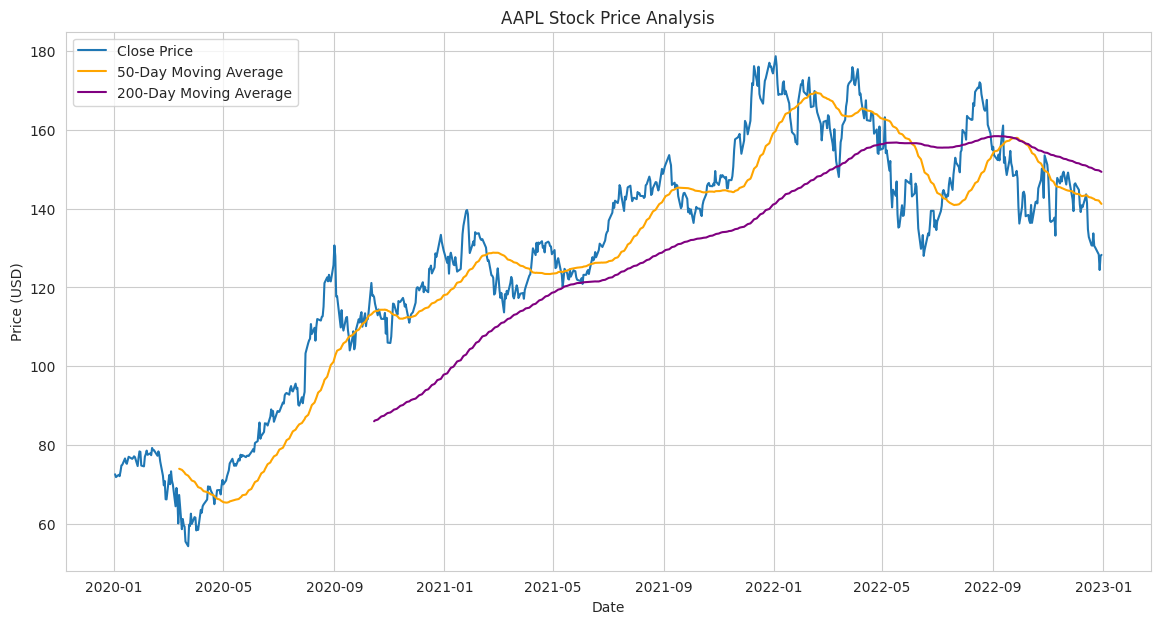

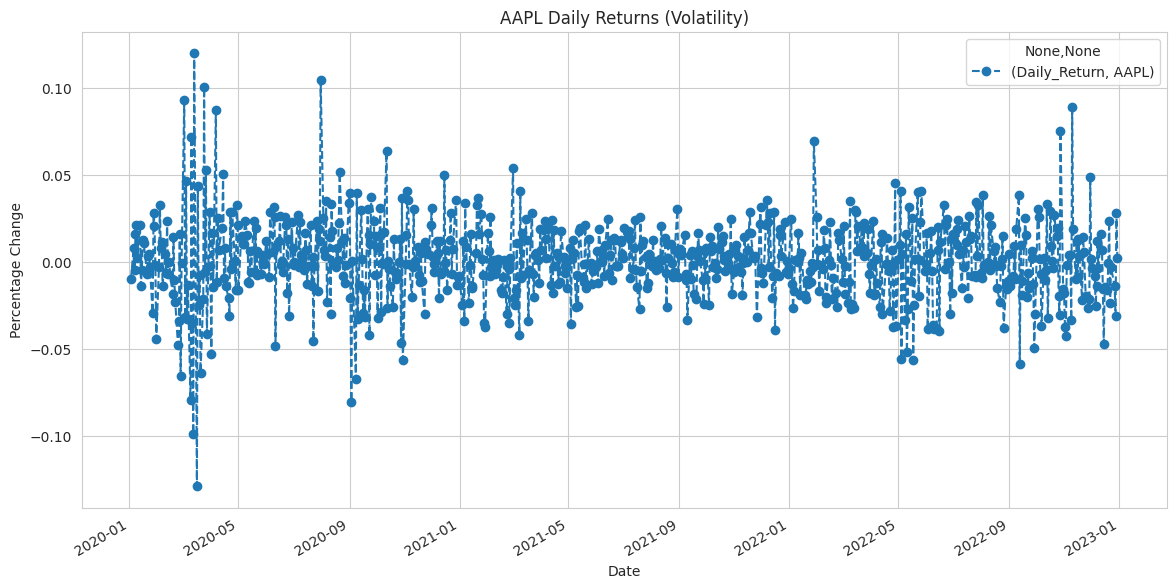

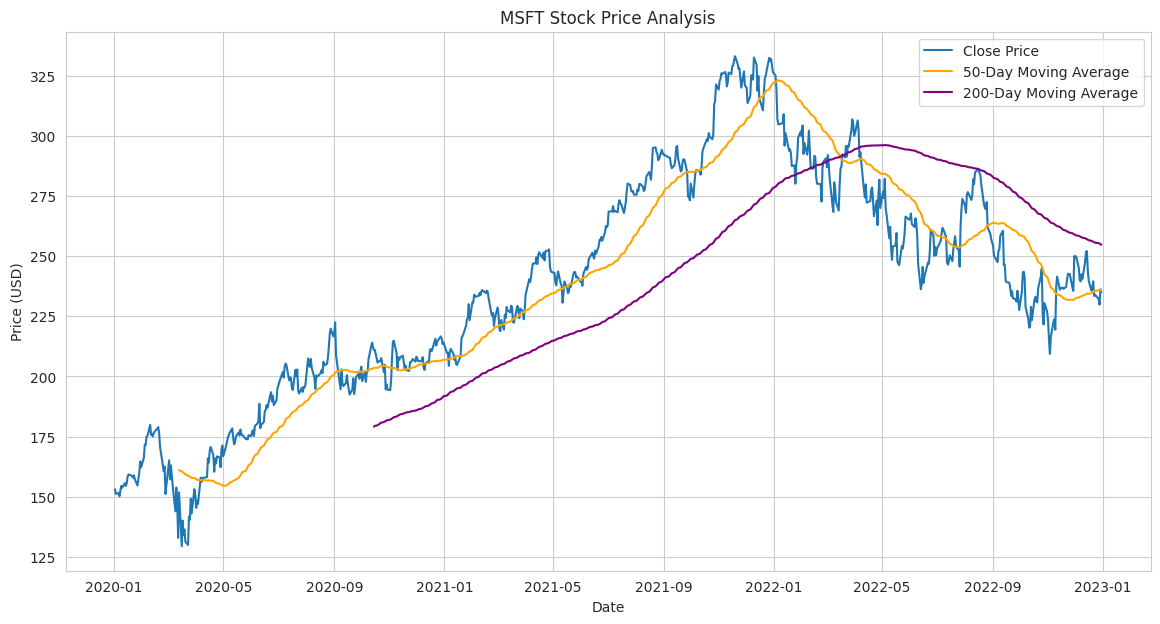

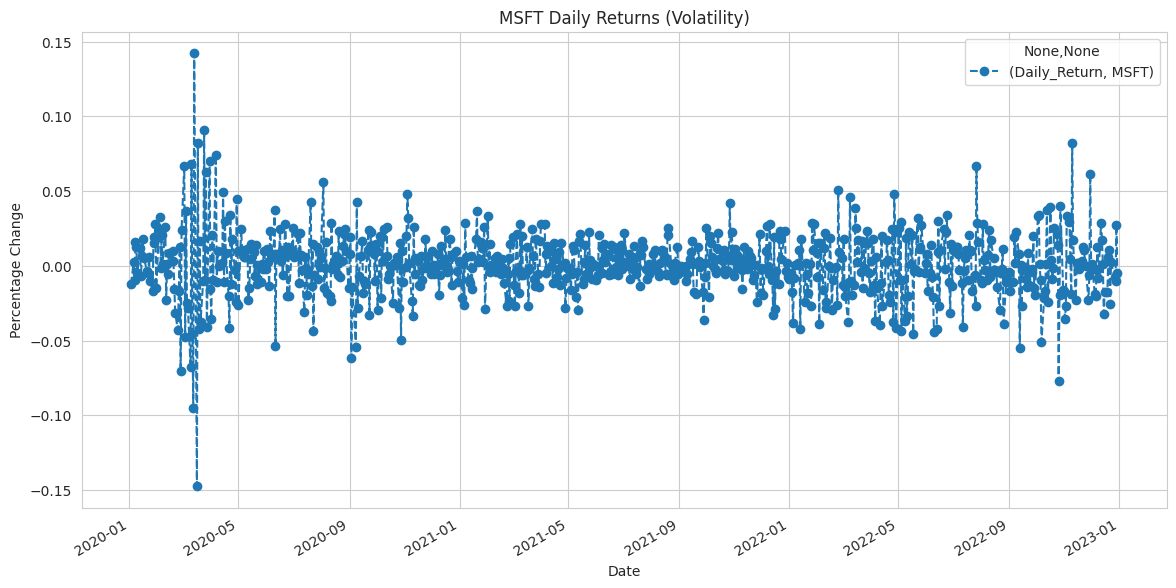

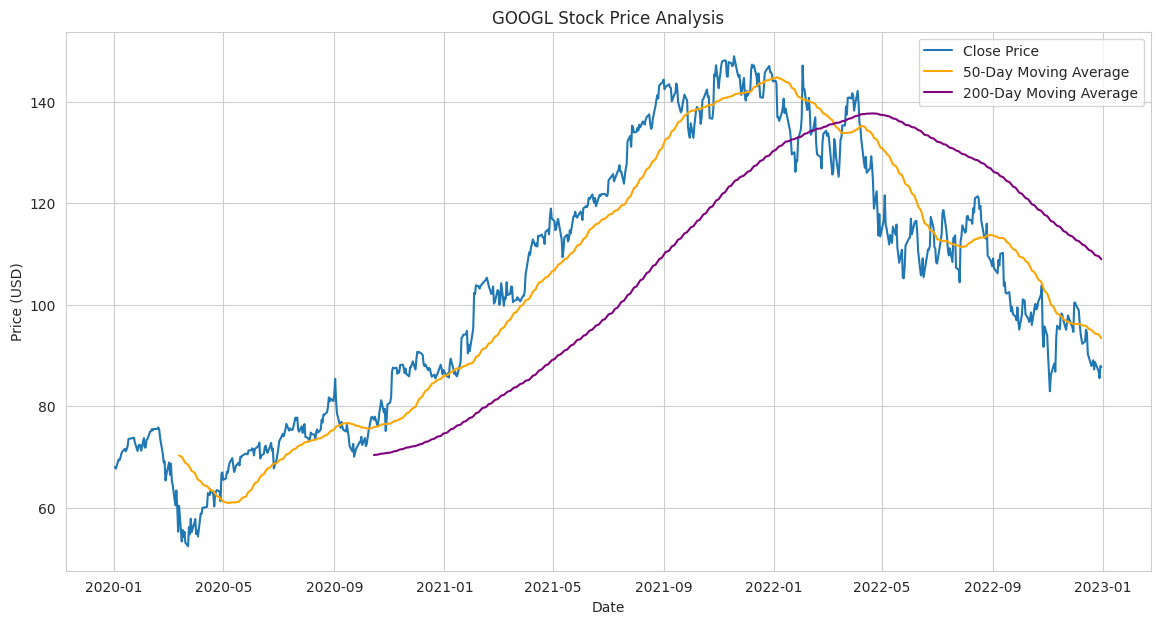

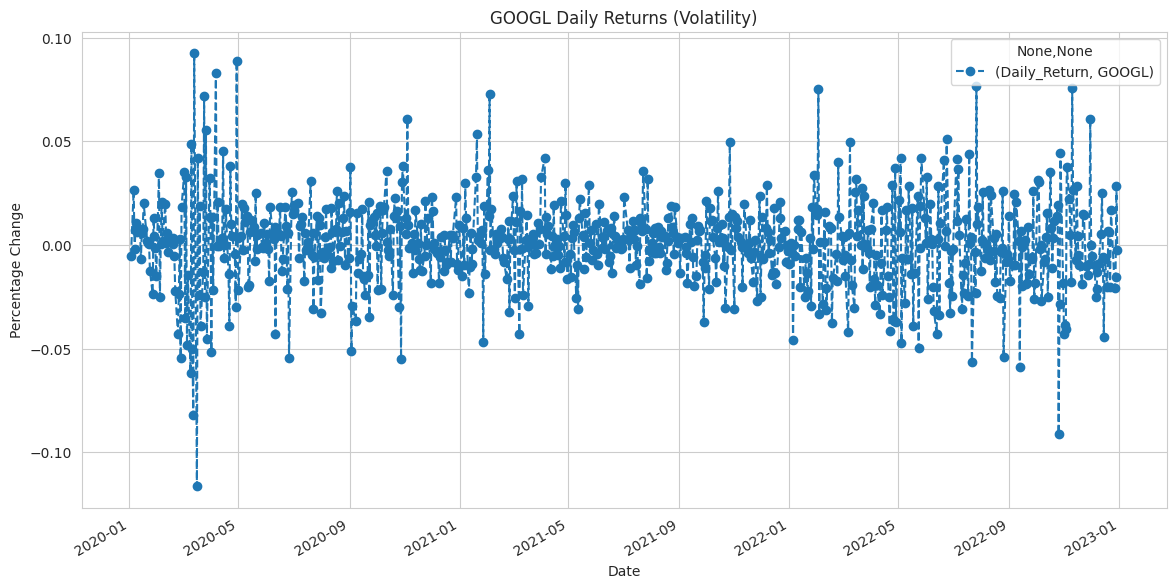

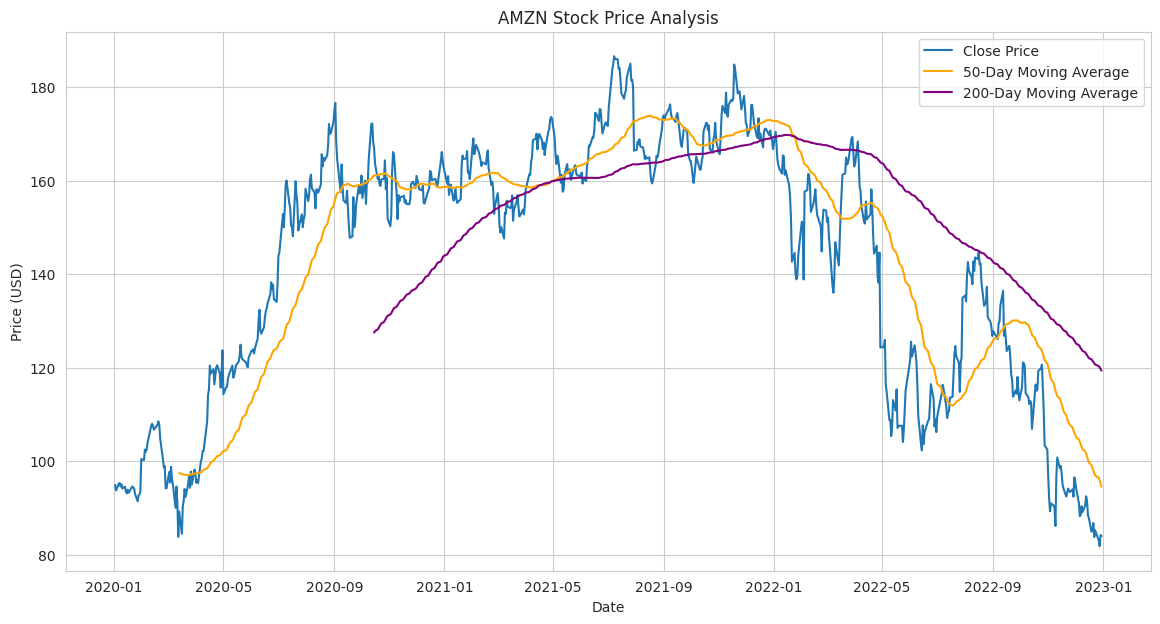

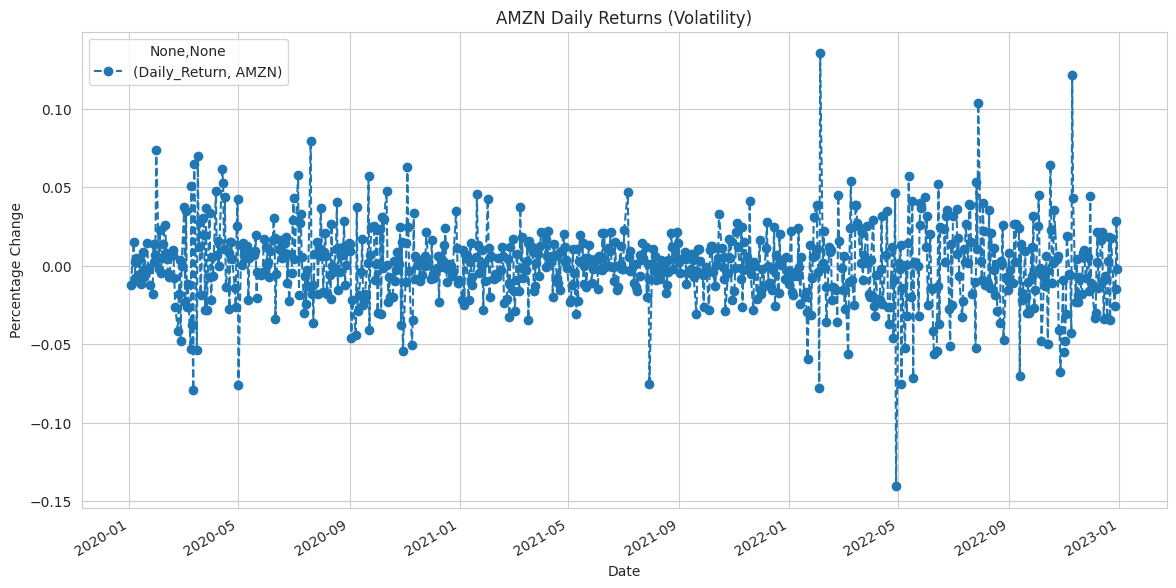

In [ ]:
# Set plot style
sns.set_style('whitegrid')

# Loop through each ticker to create and display its plots
for ticker in ticker_list:

    # --- Plot 1: Stock Price Analysis ---
    plt.figure(figsize=(14, 7))
    plt.plot(all_data[('Close', ticker)], label='Close Price')
    plt.plot(all_data[('MA50', ticker)], label='50-Day Moving Average', color='orange')
    plt.plot(all_data[('MA200', ticker)], label='200-Day Moving Average', color='purple')
    plt.title(f'{ticker} Stock Price Analysis')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

    # --- Plot 2: Volatility Analysis ---
    plt.figure(figsize=(14, 7))
    all_data[('Daily_Return', ticker)].plot(legend=True, linestyle='--', marker='o')
    plt.title(f'{ticker} Daily Returns (Volatility)')
    plt.xlabel('Date')
    plt.ylabel('Percentage Change')
    plt.show()


<Figure size 1400x700 with 0 Axes>

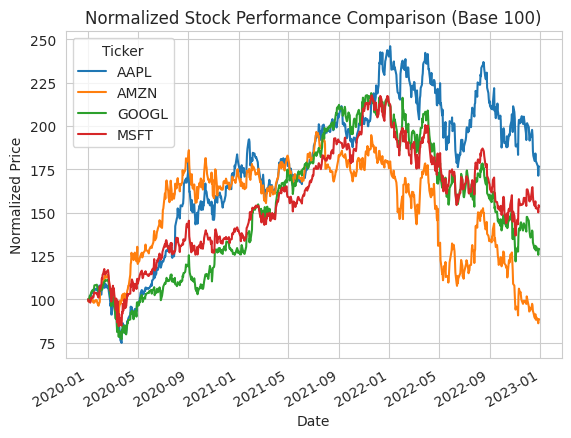

In [ ]:
# Normalize the closing prices to compare performance
normalized_prices = all_data['Close'].apply(lambda x: (x / x.iloc[0]) * 100)

# Plot the normalized stock prices
plt.figure(figsize=(14, 7))
normalized_prices.plot(grid=True)
plt.title('Normalized Stock Performance Comparison (Base 100)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend(title='Ticker')
plt.show()
